In [38]:
import pandas as pd
import tensorflow as tf
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from livelossplot import PlotLossesKeras
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [39]:
data = pd.read_csv("clean_data.csv")

In [40]:
num_columns = [
    'phones_num',
    'phb_fraud',
    'phb_dirty',
    'phb_all_bad',
    'phb_all',
    'phb_bad_perc',
    'found_phones',
    'phb_fraud_dir',
    'phb_dirty_dir',
    'phb_all_bad_dir',
    'phb_all_dir',
    'phb_bad_perc_dir',
    'found_phones_dir',
    'claims_percent',
    'claims_num',
    'appl_num',
    'complaints_num',
    'complaints_num_dir',
    'mvd_request_num',
    'bad_rep_tcb',
    'total_case_cnt',
    'total_defendant_case_cnt',
    'total_defendant_case_amt',
    'defendant_case_perc',
    'rating_ya',
    'ratings_cnt_ya',
    'reviews_cnt_ya',
    'rating_yell',
    'reviews_cnt_yell',
    'rating_2gis',
    'reviews_cnt_2gis',
    'rating_avito',
    'reviews_cnt_avito'
]
cat_columns = [
    "id",
    "date"
]

In [41]:
data.columns

Index(['id', 'date', 'phones_num', 'phb_fraud', 'phb_dirty', 'phb_all_bad',
       'phb_all', 'phb_bad_perc', 'found_phones', 'phb_fraud_dir',
       'phb_dirty_dir', 'phb_all_bad_dir', 'phb_all_dir', 'phb_bad_perc_dir',
       'found_phones_dir', 'claims_percent', 'claims_num', 'appl_num',
       'complaints_num', 'complaints_num_dir', 'mvd_request_num',
       'bad_rep_tcb', 'total_case_cnt', 'total_defendant_case_cnt',
       'total_defendant_case_amt', 'defendant_case_perc', 'rating_ya',
       'ratings_cnt_ya', 'reviews_cnt_ya', 'rating_yell', 'reviews_cnt_yell',
       'rating_2gis', 'reviews_cnt_2gis', 'rating_avito', 'reviews_cnt_avito'],
      dtype='object')

In [42]:
data.sample(5)

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,defendant_case_perc,rating_ya,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito
4242,a235600717259a,2022-10-16 00:00:00,2,0,0,0,2330,0.00,2,0,...,0.0,3.9,4,0,-1.0,-1,-1.0,-1,-1.0,-1
5271,a2536177846a,2020-11-18 00:00:00,4,0,0,0,156,0.00,2,0,...,0.0,-1.0,-1,-1,-1.0,-1,0.0,0,-1.0,-1
9645,a510705268279a,2022-11-02 00:00:00,1,0,0,0,1964,0.00,1,0,...,0.0,-1.0,-1,-1,-1.0,-1,-1.0,-1,-1.0,-1
6284,a1832150899a,2022-09-25 00:00:00,2,0,0,0,1781,0.00,2,0,...,0.0,-1.0,-1,-1,4.5,0,-1.0,-1,-1.0,-1
8673,a7730116868a,2022-05-06 00:00:00,8,1,0,1,1895,0.05,8,0,...,0.0,4.5,30354,8066,-1.0,-1,4.2,29,-1.0,-1


In [43]:
data.shape

(15000, 35)

In [44]:
data = np.asarray(data[num_columns]).astype(np.float32)

In [45]:
class AnomalyDetector(tf.keras.Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(33, 1)),
            tf.keras.layers.Dense(1024, activation="sigmoid"),
            tf.keras.layers.Dense(128, activation="sigmoid"),
            tf.keras.layers.Dense(2, activation="sigmoid")])

        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(140,  activation="sigmoid"),
            tf.keras.layers.Dense(32, activation="sigmoid"),
            tf.keras.layers.Dense(33, activation="sigmoid")
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()

In [46]:
autoencoder.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"]
)

In [47]:
data.shape

(15000, 33)

In [48]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, data, test_size=0.2, random_state=21
)

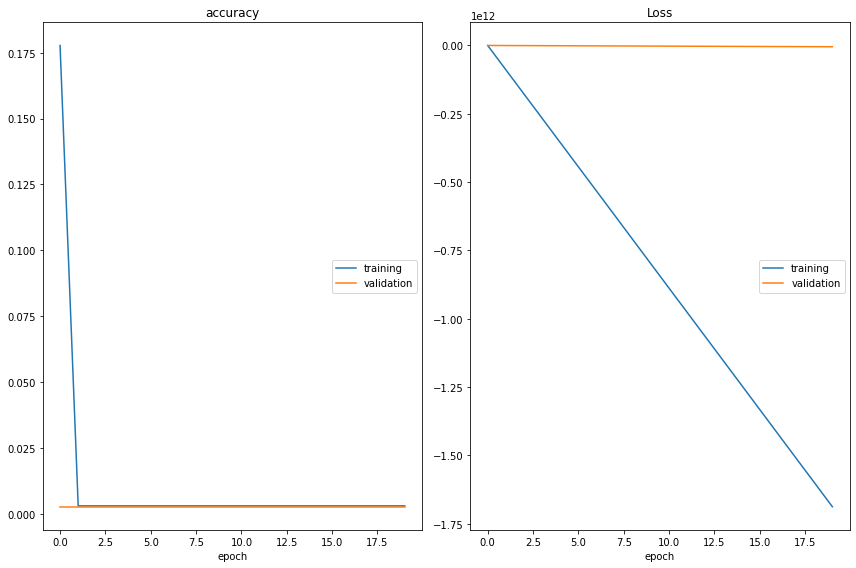

accuracy
	training         	 (min:    0.003, max:    0.178, cur:    0.003)
	validation       	 (min:    0.003, max:    0.003, cur:    0.003)
Loss
	training         	 (min: -1687736025088.000, max: -410216352.000, cur: -1687736025088.000)
	validation       	 (min: -4980179456.000, max: -248951280.000, cur: -4980179456.000)


In [49]:
history = autoencoder.fit(
    train_data, train_data,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_data),
    shuffle=True,
    callbacks=[PlotLossesKeras()], verbose=False
)

In [50]:
autoencoder.predict(data)[:10]

469/469 [==============================] - 0s 653us/step


array([[1.        , 0.99963313, 0.98246145, 0.99999964, 1.        ,
        0.31285274, 1.        , 0.47751865, 0.41220766, 0.57972234,
        1.        , 0.2495961 , 0.97649956, 0.30874115, 0.1786472 ,
        0.9984066 , 0.27335477, 0.15263452, 0.4344284 , 0.11619194,
        0.34728396, 0.26376575, 1.        , 0.5057968 , 0.226818  ,
        1.        , 1.        , 0.72641766, 0.9239336 , 0.08883569,
        1.        , 0.00365061, 0.08323213],
       [1.        , 0.99963313, 0.98246145, 0.99999964, 1.        ,
        0.31285274, 1.        , 0.47751865, 0.41220766, 0.57972234,
        1.        , 0.2495961 , 0.97649956, 0.30874115, 0.1786472 ,
        0.9984066 , 0.27335477, 0.15263452, 0.4344284 , 0.11619194,
        0.34728396, 0.26376575, 1.        , 0.5057968 , 0.226818  ,
        1.        , 1.        , 0.72641766, 0.9239336 , 0.08883569,
        1.        , 0.00365061, 0.08323213],
       [1.        , 0.99963313, 0.98246145, 0.99999964, 1.        ,
        0.31285274, 1.    

In [51]:
data = pd.read_csv("clean_data.csv")

In [52]:
mergings = linkage(data[num_columns].values, method='complete')

In [53]:
mergings[:10]

array([[7.1310e+03, 8.4140e+03, 0.0000e+00, 2.0000e+00],
       [9.7160e+03, 1.0564e+04, 0.0000e+00, 2.0000e+00],
       [1.2040e+04, 1.2554e+04, 0.0000e+00, 2.0000e+00],
       [9.7390e+03, 1.4162e+04, 0.0000e+00, 2.0000e+00],
       [6.1540e+03, 1.2240e+04, 0.0000e+00, 2.0000e+00],
       [3.1480e+03, 1.2943e+04, 0.0000e+00, 2.0000e+00],
       [1.3107e+04, 1.3188e+04, 0.0000e+00, 2.0000e+00],
       [1.0950e+04, 1.4451e+04, 0.0000e+00, 2.0000e+00],
       [1.2390e+04, 1.3577e+04, 0.0000e+00, 2.0000e+00],
       [1.0878e+04, 1.3063e+04, 0.0000e+00, 2.0000e+00]])

In [64]:
model = TSNE(n_components=2, learning_rate='auto',
                                    init='random', perplexity=200) # perplexity можно поставить больше, нооооооо...

In [65]:
transformed = model.fit_transform(data[num_columns])

In [66]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

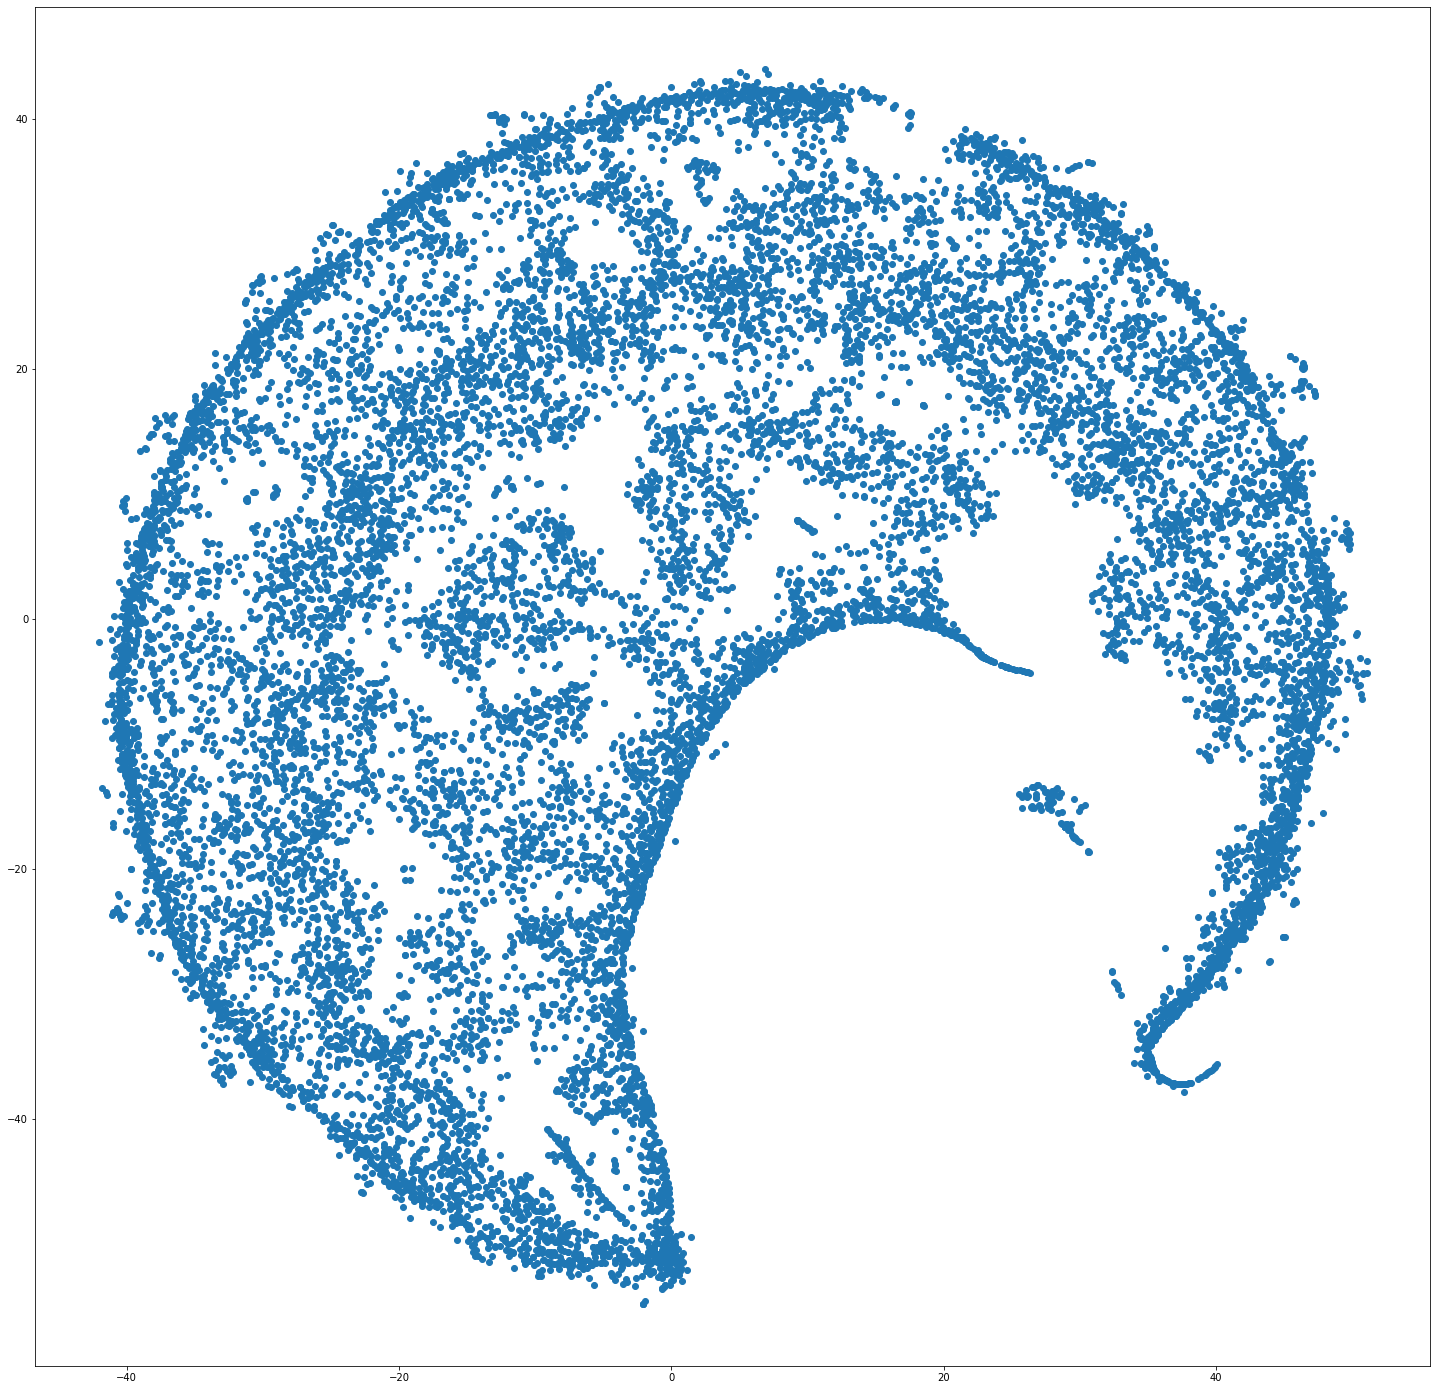

In [67]:
fig = plt.figure(figsize=(25, 25))
plt.scatter(x_axis, y_axis)
name = "figure/TSNE25x25"
plt.savefig(f"{name}.svg")
plt.savefig(f"{name}.jpg")
plt.show()

In [68]:
transformed[:10]

array([[ 18.565271  ,  26.032969  ],
       [ 41.065315  ,  19.333677  ],
       [ 21.062578  ,  33.900192  ],
       [  4.359976  ,  -4.908275  ],
       [ 43.910965  , -27.394228  ],
       [ 48.987537  ,  -3.2665033 ],
       [ -0.16564858,   7.332743  ],
       [-20.145649  , -45.52476   ],
       [ -6.791671  ,  -7.8746758 ],
       [-25.874218  , -17.407894  ]], dtype=float32)

In [69]:
model_ = KMeans(n_clusters=2)

In [70]:
model_.fit(transformed)

KMeans(n_clusters=2)

In [71]:
pd.Series(model_.predict(transformed)).value_counts()

0    7633
1    7367
dtype: int64

In [72]:
import pickle

In [73]:
with open("models/tsne.bf", "+wb") as file:
    pickle.dump(model, file)

In [74]:
with open("models/kmeans.bf", "+wb") as file:
    pickle.dump(model_, file)